In [104]:
import json 
import matplotlib.pyplot as plt 
import pandas as pd
import glob
import os
import numpy as np
import math

In [3]:
# file_list = os.listdir('/workspace/output/')

# for i in file_list:
    
#     if 'hyper_tune_4' in i:
        
#         !rm -r {'/workspace/output/' + i}

In [4]:
list_of_files = glob.glob('/workspace/output/') # * means all if need specific format then *.csv
list_of_files = sorted(list_of_files, key=os.path.getctime)

In [5]:
list_of_files
len('/workspace/output/output_new_')

29

In [1]:
str.replace('bbox/AP50', '/','')

'bboxAP50'

In [43]:
plt.style.use("seaborn-v0_8-colorblind")

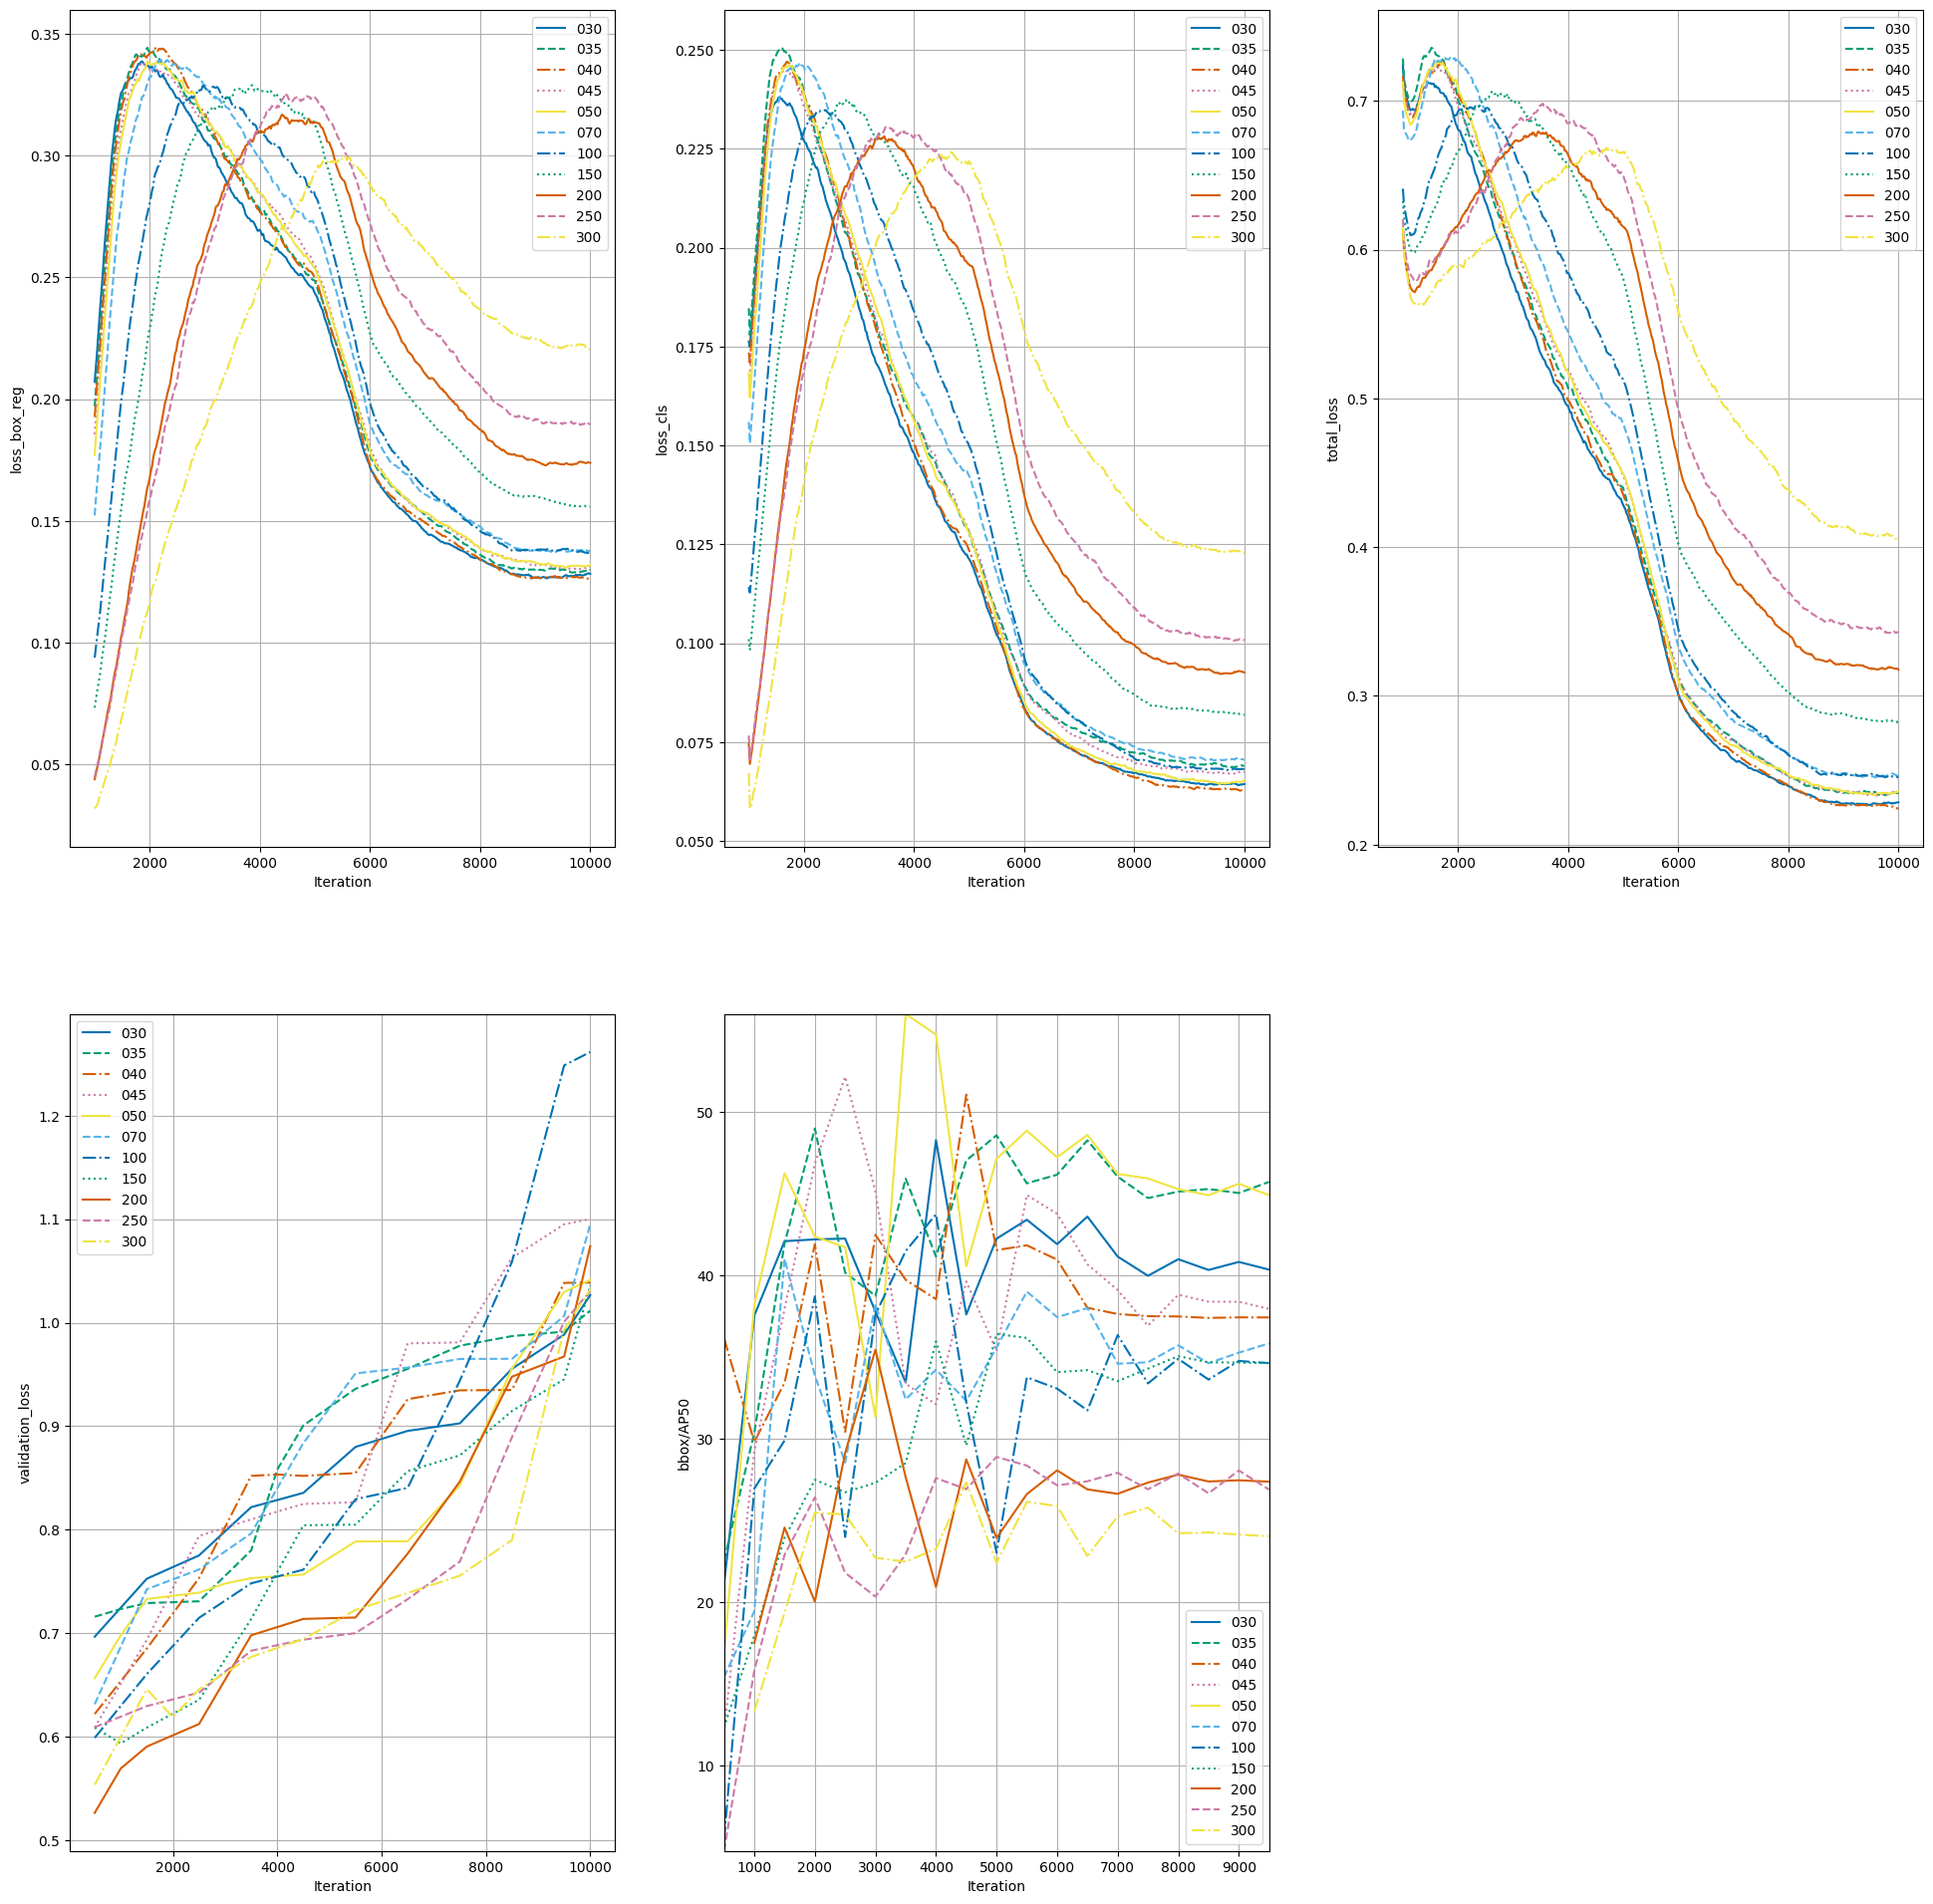

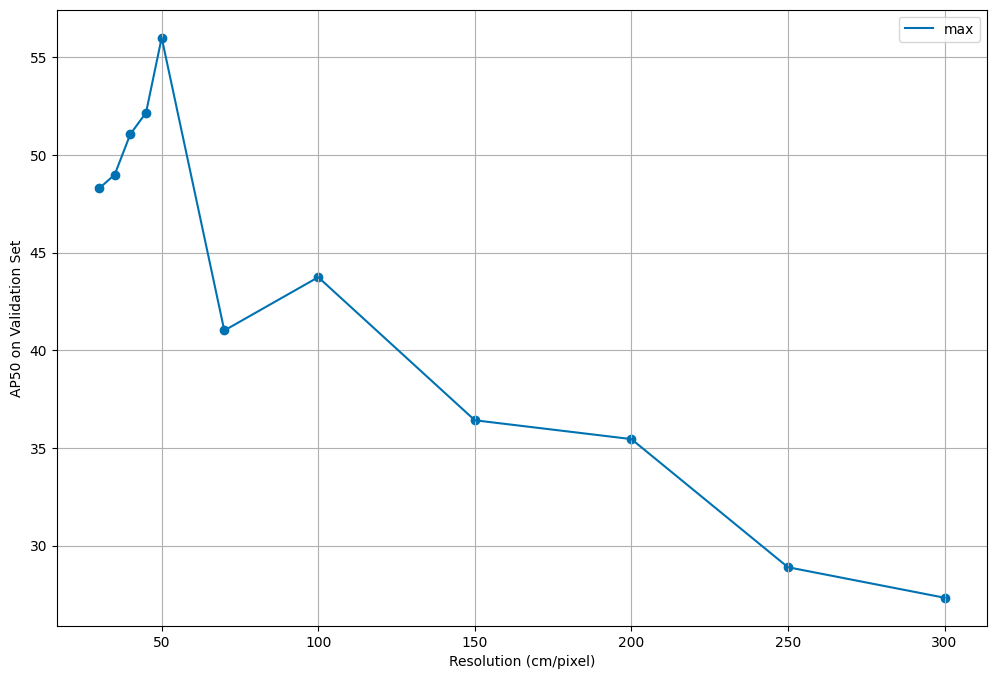

[48.28422440325353,
 48.99327594857924,
 51.06957432869631,
 52.16365865921517,
 56.003882647143996,
 41.01076534119507,
 43.74025070878686,
 36.41392794014982,
 35.449493807650875,
 28.887853509861973,
 27.32617646606909]

In [96]:
plotting_files = ['/workspace/output/exp3/16006400_USNZ_04.20.16.42/towers_030',
             '/workspace/output/exp3/16006400_USNZ_04.20.16.42/towers_035',
             '/workspace/output/exp3/16006400_USNZ_04.20.16.42/towers_040',
             '/workspace/output/exp3/16006400_USNZ_04.20.16.42/towers_045',
             '/workspace/output/exp3/16006400_USNZ_04.20.16.42/towers_050',
             '/workspace/output/exp3/16006400_USNZ_04.20.16.42/towers_070',
             '/workspace/output/exp3/16006400_USNZ_04.20.16.42/towers_100',
            '/workspace/output/exp3/16006400_USNZ_16006400_04.19.13.31/towers_150',
            '/workspace/output/exp3/16006400_USNZ_16006400_04.19.13.31/towers_200',
            '/workspace/output/exp3/16006400_USNZ_16006400_04.19.13.31/towers_250',
                 '/workspace/output/exp3/16006400_USNZ_16006400_04.19.13.31/towers_300']

resolution_set = ['030','035','040','045','050','070','100','150','200','250','300']

ltys = ['-','--','-.',':']
#resolution_set = ['100400','400900','9001600','16006400']
#resolution_set = ['030','035','040','045','050','070','100']

def plot_metrics(plotting_files, 
                 resolution_set, 
                window_divider = 10,   # divides the number of iterations for averaging window set
                losses = ['loss_box_reg', 'loss_cls', 'total_loss', 'validation_loss', 'bbox/AP50']): 
    ap50_max = []
    ap50_last = []

    plt.figure(figsize = (12*2,8*3))
    for n, loss in enumerate(losses):
        plt.subplot(2,3,n+1)
        
        l = 0
        for latest_file, res in zip(plotting_files, resolution_set):
            

            experiment_metrics = load_json_arr(latest_file + f'/metrics.json')

            ap50_max.append(max([met["bbox/AP50"] for met in experiment_metrics if 'bbox/AP50' in met and 'validation_loss' in met and not math.isnan(met["bbox/AP50"])]))
            ap50_last.append([met["bbox/AP50"] for met in experiment_metrics  if 'bbox/AP50' in met and 'validation_loss' in met][-1])

            # Extract the values for the specified loss
            loss_values = [x[loss] for x in experiment_metrics if loss in x]

            if loss not in ['validation_loss','bbox/AP50'] and window_divider >0:
                window_size = round(len(loss_values)/window_divider)

                # Calculate the rolling average of the loss over a specified window size
                loss_avg = np.convolve(loss_values, np.ones(window_size) / window_size, mode='valid')            
                plt.plot(
                    [x['iteration'] for x in experiment_metrics if loss in x][window_size-1:], 
                    loss_avg, 
                    label = res,
                    linestyle = ltys[l%(len(ltys))],
                    alpha = 1
                )
                plt.xlabel('Iteration')
                plt.ylabel(loss)
                #plt.title(loss)
                plt.legend()
                plt.grid()

            else: 
                plt.plot(
                    [x['iteration'] for x in experiment_metrics if loss in x and 'validation_loss' in x], 
                    [x[loss] for x in experiment_metrics if loss in x and 'validation_loss' in x], 
                    label = res,
                    linestyle = ltys[l%(len(ltys))],
                    alpha = 1
                )
                plt.xlabel('Iteration')
                plt.ylabel(loss)
                #plt.title(loss)
                plt.legend()
                plt.grid()
            l += 1
        #plt.gca().set_axis_off()
    plt.margins(0,0)
    plt.savefig(f"/workspace/figures/loss_curves_{str.replace(loss, '/','')}", 
                bbox_inches = 'tight',
                pad_inches = .25)
    plt.show()

    plt.figure(figsize=(12,8))
    plt.plot([int(res) for res in resolution_set], ap50_max[:len(resolution_set)], label = "max")
    plt.scatter([int(res) for res in resolution_set], ap50_max[:len(resolution_set)])
#     plt.plot([int(res) for res in resolution_set], ap50_last[:len(resolution_set)], label = 'last')
#     plt.scatter([int(res) for res in resolution_set], ap50_last[:len(resolution_set)])
    plt.legend()
    plt.grid()
    plt.xlabel('Resolution (cm/pixel)')
    plt.ylabel("AP50 on Validation Set")
    plt.show()
    
    return ap50_max[:len(resolution_set)]
    
plot_metrics(plotting_files, resolution_set)

## plot test AP50 scores of the data stratified by tower size

In [29]:
test_ap = load_json_arr('/workspace/output/exp3/test_set_evals_USNZ_res030.json')

with open('/workspace/output/exp3/test_set_evals_USNZ_res030.json', 'r') as f:
    test_ap50 = json.load(f)

In [105]:
with open('/workspace/output/exp3/model_exp1_test.json', 'r') as f:
    test_exp1_ap50 = json.load(f)


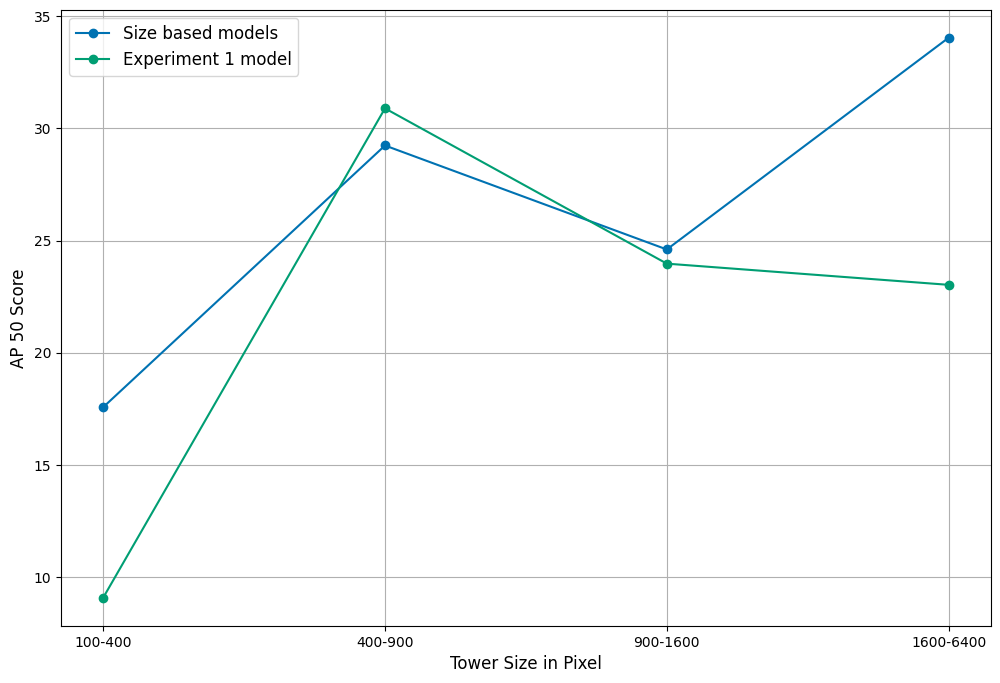

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# get the dictionary keys and values
keys = list(test_ap50.keys())
values = list(test_ap50.values())

keys_2 = list(test_exp1_ap50.keys())
values_2 = list(test_exp1_ap50.values())


plt.figure(figsize=(12,8))

# create the plot
plt.plot(keys, values, '-o', label = 'Size based models')
plt.plot(keys,values_2,'-o',label='Experiment 1 model')


plt.xlabel('Tower Size in Pixel',fontsize='large')
plt.ylabel('AP 50 Score',fontsize='large')
plt.legend(loc='upper left', fontsize='large')



plt.grid()


plt.savefig(f"/workspace/figures/exp3/test_evals_exp3_final", 
            bbox_inches = 'tight',
            pad_inches = .25)

plt.show()

In [79]:
values

[17.568422632564637, 29.241679440854735, 24.60436272684749, 34.04870841825416]

## plot final test scores from 16006400 dwonsampling

In [97]:
final_test_ap = load_json_arr('/workspace/output/exp3/test_set_evals_big_lowres.json')

with open('/workspace/output/exp3/test_set_evals_big_lowres.json', 'r') as f:
    final_test_ap50 = json.load(f)

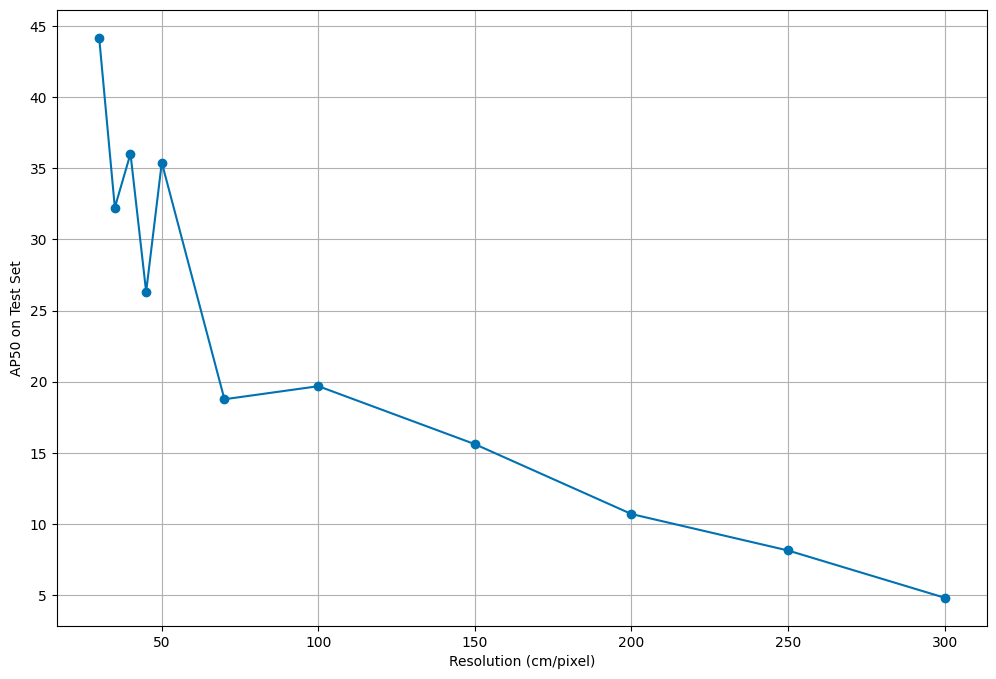

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

# get the dictionary keys and values
keys = list(final_test_ap50.keys())
keys_num = [int(val) for val in keys]
values = list(final_test_ap50.values())

# create the plot
plt.plot(keys_num, values,marker='o')

# add labels to the plot
plt.xlabel('Resolution (cm/pixel)')
plt.ylabel('AP50 on Test Set')

# show the plot
plt.grid()

plt.savefig(f"/workspace/figures/exp3/final_test_scores_exp3", 
           bbox_inches = 'tight',
           pad_inches = .25)

plt.show()

## for paper & individual saving

In [11]:
#!pip install seaborn

In [99]:
## for paper & individual saving


import seaborn as sns
colors = sns.color_palette('colorblind',  as_cmap=True)

def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines

ltys = ['-','--','-.',':']
resolution_set = ['030','035','040','045','050','070','100']

def save_metrics(plotting_files, 
                 resolution_set, 
                window_divider = 10,   # divides the number of iterations for averaging window set
                losses = ['loss_box_reg', 'loss_cls', 'total_loss', 'validation_loss', 'bbox/AP50']): 
    ap50_max = []
    ap50_last = []

    plt.figure(figsize = (12,8))    
    for n, loss in enumerate(losses):
        #plt.subplot(2,3,n+1)

        l = 0
        for latest_file, res in zip(plotting_files, resolution_set):
            

            experiment_metrics = load_json_arr(latest_file + f'/metrics.json')

            # Extract the values for the specified loss
            loss_values = [x[loss] for x in experiment_metrics if loss in x]

            if loss not in ['validation_loss','bbox/AP50'] and window_divider >0:
                window_size = round(len(loss_values)/window_divider)

                # Calculate the rolling average of the loss over a specified window size
                loss_avg = np.convolve(loss_values, np.ones(window_size) / window_size, mode='valid')            
                plt.plot(
                    [x['iteration'] for x in experiment_metrics if loss in x][window_size-1:], 
                    loss_avg, 
                    label = res,
                    color = colors[l],
                    linestyle = ltys[0],
                    alpha = 1
                )
                plt.xlabel('Iteration')
                plt.ylabel(loss)
                #plt.title(loss)
                #plt.grid()

            else: 
                plt.plot(
                    [x['iteration'] for x in experiment_metrics if loss in x and 'validation_loss' in x], 
                    [x[loss] for x in experiment_metrics if loss in x and 'validation_loss' in x], 
                    label = f"{res}",#_v",
                    linestyle = ltys[len(losses)-1],
                    color = colors[l],
                    alpha = 1
                )
                plt.xlabel('Iteration')
                plt.ylabel(loss)
                #plt.title(loss)
                
                #plt.grid()
            l += 1

        #plt.gca().set_axis_off()
    plt.legend(ncol = len(losses))
    plt.grid()
    plt.savefig(f"/workspace/figures/exp3/loss_curves_USNZ_{str.replace(loss, '/','')}_res_exp3", 
            bbox_inches = 'tight',
            pad_inches = .25)
    plt.show()

    
    return 


plotting_files = ['/workspace/output/exp3/towers_100400_04.18.21.48',
             '/workspace/output/exp3/towers_400900_04.18.23.39',
             '/workspace/output/exp3/towers_9001600_04.19.01.36',
             '/workspace/output/exp3/towers_16006400_04.19.03.01']

tower_sizes = ['100-400 pixel', '400-900 pixel','900-1600 pixel', '1600-6400 pixel']



In [100]:
plotting_files = ['/workspace/output/exp3/16006400_USNZ_04.20.16.42/towers_030',
             '/workspace/output/exp3/16006400_USNZ_04.20.16.42/towers_035',
             '/workspace/output/exp3/16006400_USNZ_04.20.16.42/towers_040',
             '/workspace/output/exp3/16006400_USNZ_04.20.16.42/towers_045',
             '/workspace/output/exp3/16006400_USNZ_04.20.16.42/towers_050',
             '/workspace/output/exp3/16006400_USNZ_04.20.16.42/towers_070',
             '/workspace/output/exp3/16006400_USNZ_04.20.16.42/towers_100',
            '/workspace/output/exp3/16006400_USNZ_16006400_04.19.13.31/towers_150',
            '/workspace/output/exp3/16006400_USNZ_16006400_04.19.13.31/towers_200',
            '/workspace/output/exp3/16006400_USNZ_16006400_04.19.13.31/towers_250',]

resolution_set = ['030','035','040','045','050','070','100','150','200','250']

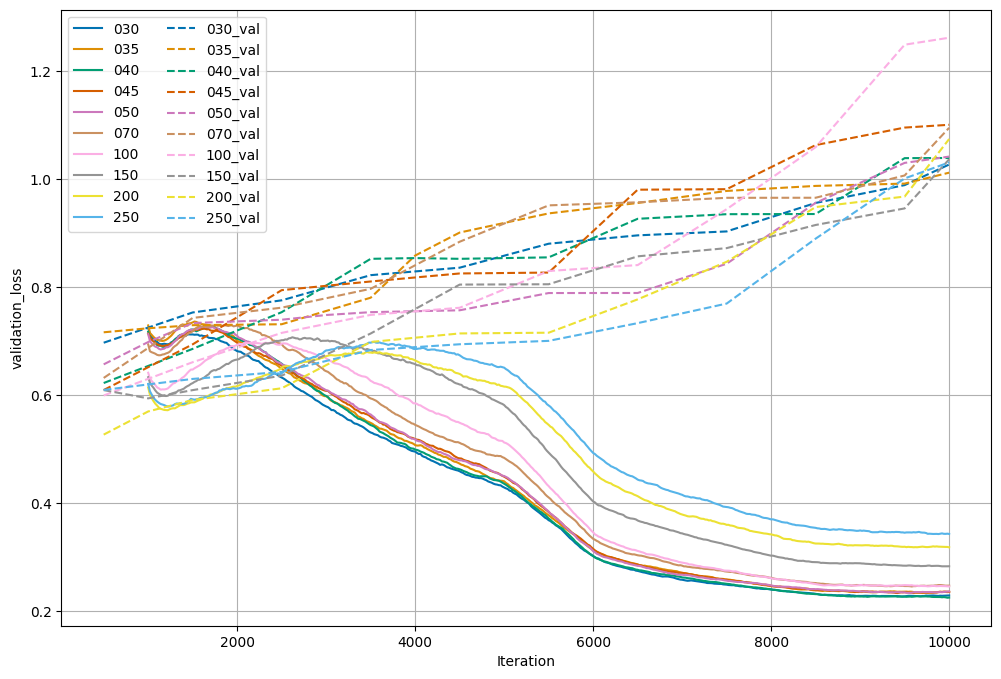

In [88]:
save_metrics(plotting_files, resolution_set, losses = ['total_loss', 'validation_loss'])

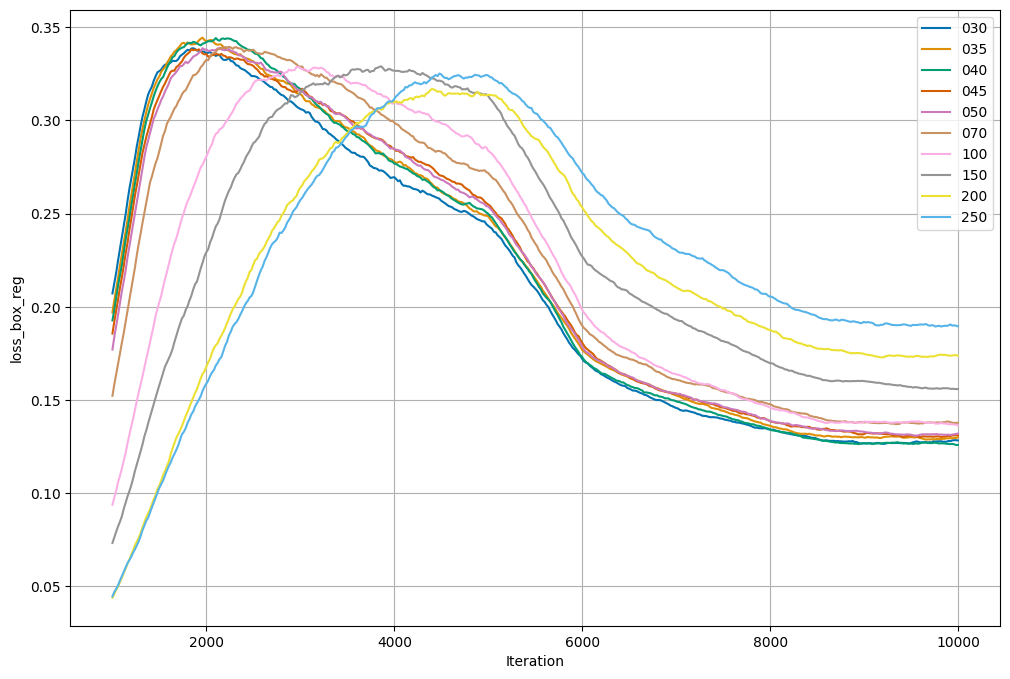

In [101]:
save_metrics(plotting_files, resolution_set, losses = ['loss_box_reg'])

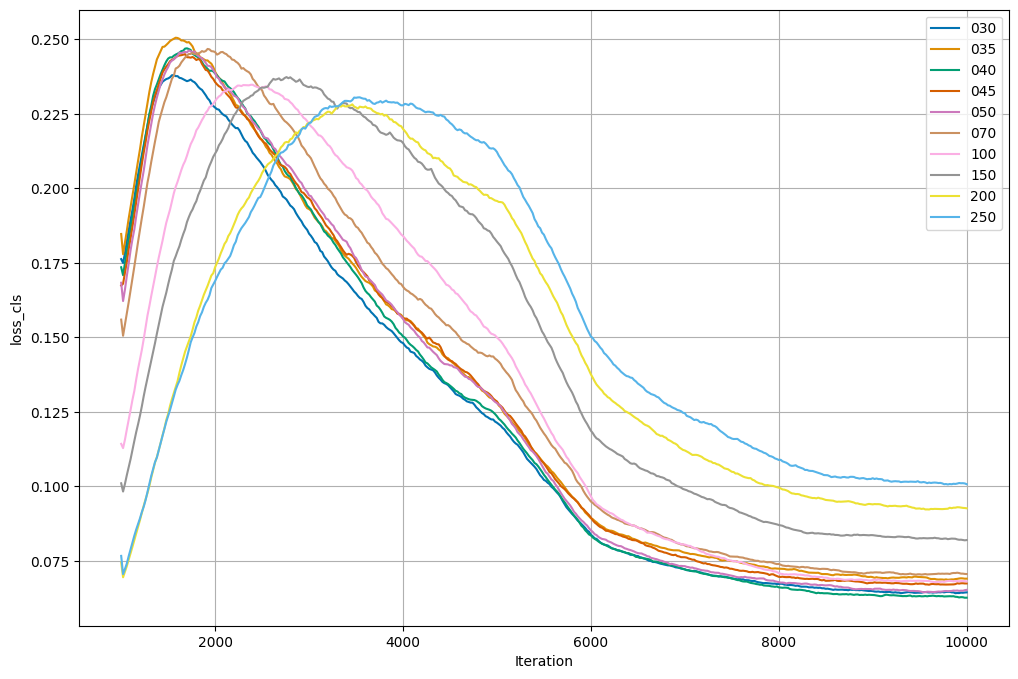

In [102]:
save_metrics(plotting_files, resolution_set, losses = ['loss_cls'])

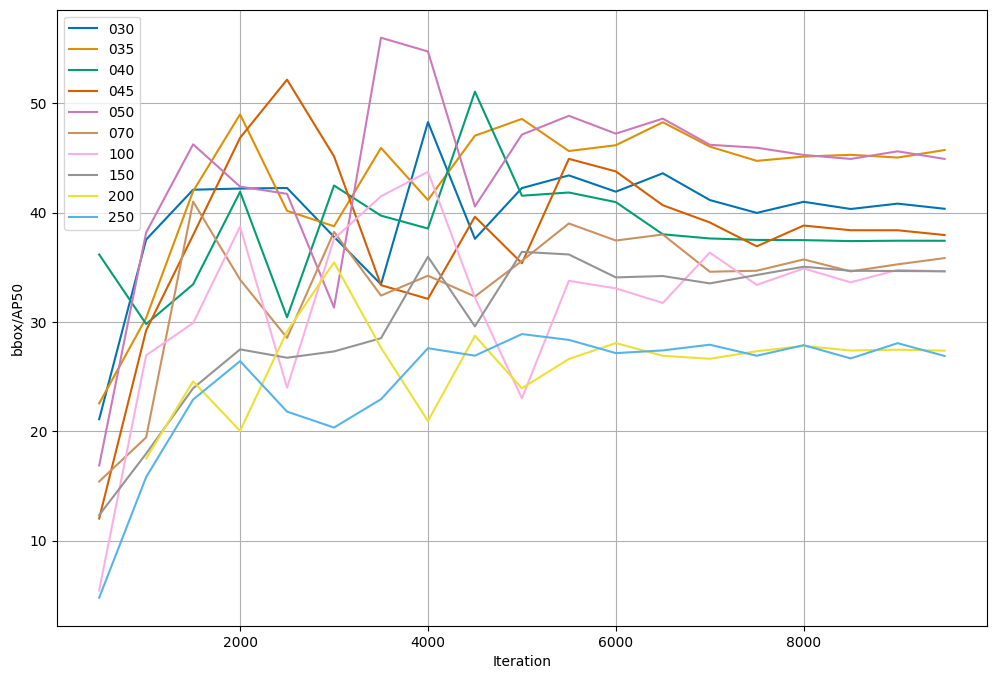

In [103]:
save_metrics(plotting_files, resolution_set, losses = ['bbox/AP50'])

In [81]:
plot_files = ['/workspace/output/exp3/USNZ_100400_04.20.09.44/towers_030',
             '/workspace/output/exp3/USNZ_400900_04.20.10.38/towers_030',
             '/workspace/output/exp3/USNZ_9001600_04.20.11.43/towers_030',
             '/workspace/output/exp3/USNZ_16006400_04.20.12.39/towers_030']

tower_sizes = ['100-400 pixel', '400-900 pixel','900-1600 pixel', '1600-6400 pixel']




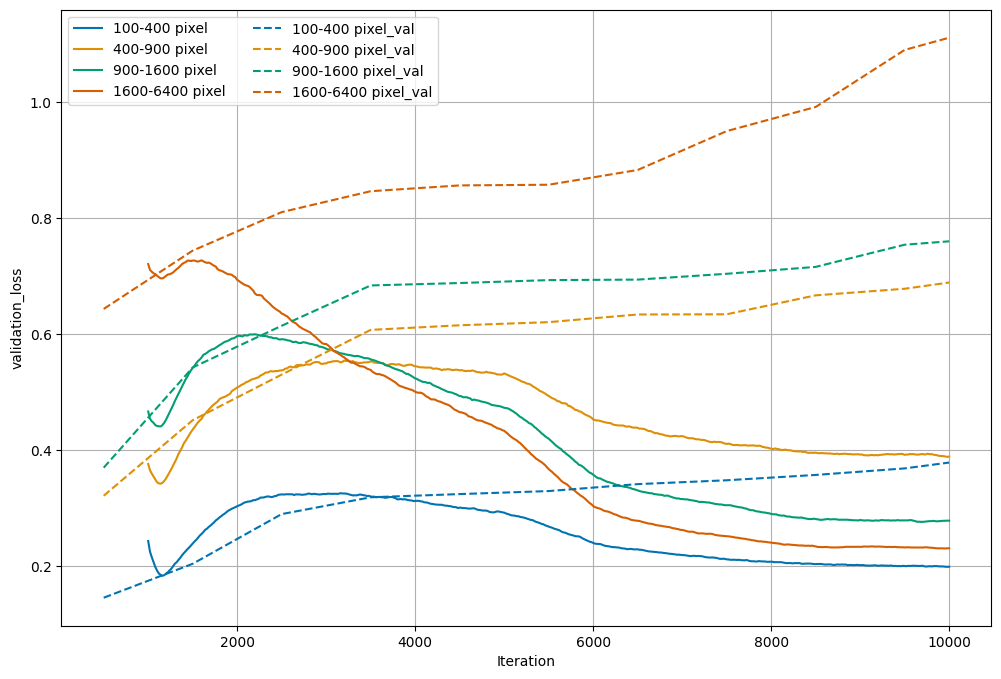

In [84]:
save_metrics(plot_files, tower_sizes, losses = ['total_loss', 'validation_loss'])